## Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


TensorFlow version: 2.18.0
GPU available: True


## Load and Explore the MNIST Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


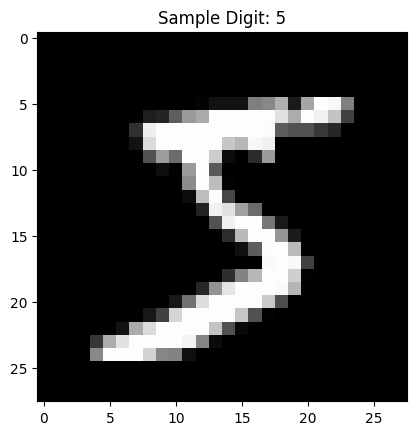

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print dataset shapes
print("Training data shape:", x_train.shape)  # 60,000 images, 28x28 pixels
print("Test data shape:", x_test.shape)      # 10,000 images, 28x28 pixels

# Show a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Sample Digit: {y_train[0]}")
plt.show()

## Preprocess the Data

In [ ]:
# Normalize pixel values (0-255 to 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)  # -1 means auto-calculate batch size
x_test = x_test.reshape(-1, 28, 28, 1) # 1 means channels in image(grayscale)
#no of samples and -1 makes it flexible regardless of size of samples

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)  # 10 classes (0-9)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# converts single integer(1D) to binary vectors(2D) for crucial when training a
# neural network for a multi-class classification task

print("Data ready for training!")

Data ready for training!


In [ ]:
# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 outputs for 0-9 digits
])

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

models.Sequential, linear stack of layers, where data flows from one layer to another.

Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), to extract features from the image, 32 filters of 3x3 size. relu for non linearity to remove -ve values. input_shape specifies the input shape(needed only once), 28-3+1 = 26, 3x3 filter reduce spatial dim by 2.O/p= (26,26, 32)

MaxPooling2D((2, 2)), reduces height and width by half[since 2] to reduce the complexity in computation.(13, 13, 32)

Conv2D(64, (3, 3), activation='relu'), > 13-3+1 = 11, O/p= (11,11,64)

MaxPooling2D((2, 2)), dim/2 = 11/2 = 5.5(ground) = 5, O/p= (5,5,64)

Flatten(), 3D tensor to 1D vector = 5x5x64 = 1600

Dense(128, activation='relu'), which connects the input layer to the output layer. after pooling the layers 'Dense' will extract the info and interpret the patterns to make predictions.

Dense(10, activation='softmax'), Another connected layer with 10 neurons, which represents 0-9 numbers.

## Compile and Train the Model

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

print("Training complete!")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8724 - loss: 0.4278 - val_accuracy: 0.9769 - val_loss: 0.0787
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9805 - loss: 0.0623 - val_accuracy: 0.9831 - val_loss: 0.0592
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0410 - val_accuracy: 0.9877 - val_loss: 0.0445
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9917 - loss: 0.0267 - val_accuracy: 0.9883 - val_loss: 0.0419
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9934 - loss: 0.0195 - val_accuracy: 0.9903 - val_loss: 0.0356
Training complete!


Optimizers use gradients(d/dx of loss wrt weights) to update weights. Adam- stands for Adaptive Moment Estimation. It’s a popular choice because it combines the strengths of two other methods (momentum and RMSProp) and adapts the learning rate dynamically.

loss='categorical_crossentropy': Ideal for your multi-class(0-9 = 10 classes), setup with one-hot labels and softmax output.

Dataset: Assume x_train has 60,000 samples.

Validation Split: 20% (12,000 samples) is reserved for validation, leaving 48,000 for training.

Batch Size: 64 samples per batch → 48,000 / 64 = 750 batches per epoch.

Epochs: 5 epochs means the model processes those 48,000 training samples 5 times:

Epoch 1: First pass through all 750 batches.
Epoch 2: Second pass, refining weights.
...
Epoch 5: Fifth pass, further improving the model.

Each epoch typically reduces the loss and increases accuracy, as seen in the output.

## Evaluate the Model

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9884 - loss: 0.0339
Test accuracy: 0.9909


## Visualize Training Progress

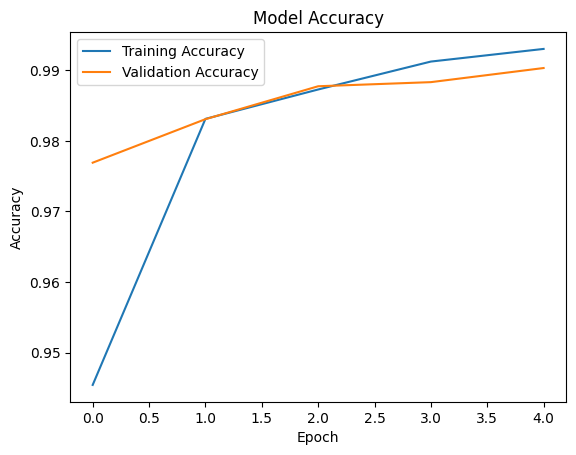

In [ ]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make Predictions (User-Friendly Output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


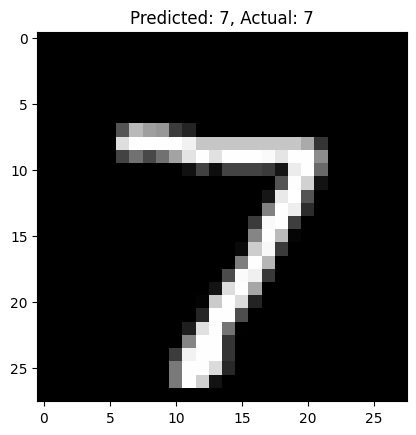

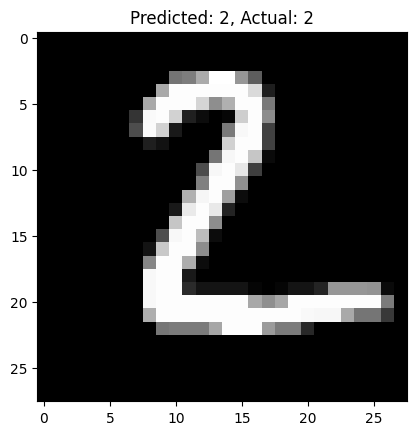

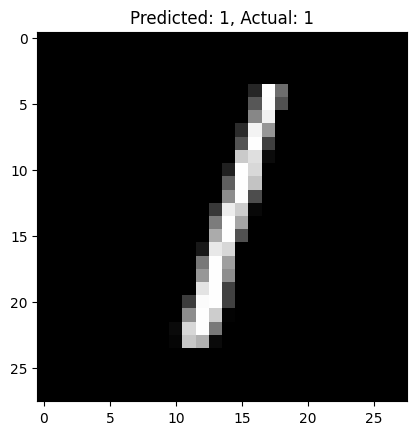

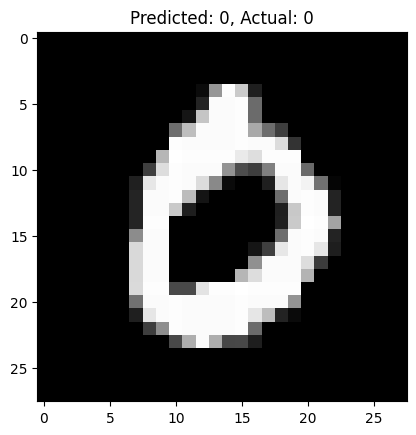

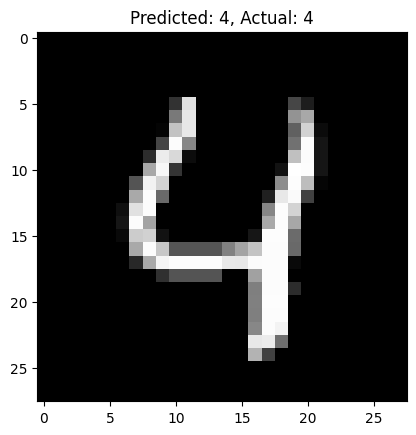

In [ ]:
# Predict on a few test images
predictions = model.predict(x_test[:5])

#Show results
for i in range(5):
    predicted_digit = np.argmax(predictions[i])
    actual_digit = np.argmax(y_test[i])
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digit}, Actual: {actual_digit}")
    plt.show()

np.argmax() from NumPy to find the index of the highest probability in predictions[i], which represents the predicted digit.

predictions[i] is a 1D array of 10 probabilities

predictions[0] = [0.01, 0.03, 0.92, 0.01, ..., 0.01], then predicted_digit = 2.

y_test[i] is a 1D array of shape (10,) (e.g., [0, 0, 1, 0, ..., 0] for digit 2).